# Velocity scaling relations

Works with jupyterlab3 on ppmstar.org

## (1) Initialization

In [1]:
%pylab ipympl
import os,sys
from multiprocessing import Pool
from tqdm import tqdm

sys.path.insert(0,'/home/user/user/niagara_scratch_sblouin/PyPPM')
from ppmpy import ppm

# set cycling combination of color-blind labels, glyphs, styles
lll= 2*['-', '--', ':', '-.']
markers = ['X','h','<','>','s','^','d','X','p']
random.shuffle(lll)
CB_color_cycle = ['#4daf4a', '#a65628', '#984ea3',
                  '#ff7f00', '#f781bf', '#377eb8',
                  '#999999', '#e41a1c', '#dede00']
rc('axes', prop_cycle=(cycler('color', CB_color_cycle[0:8]) + cycler('marker',markers[0:8])+cycler('linestyle',lll)))
import collections
hydro = collections.namedtuple('hydro', ['moms','rprof'])

# turn off matplotlib messages
logging.getLogger("matplotlib").setLevel(logging.CRITICAL)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# the list of variables that are stored within the momsdata cube.
var_list = ['xc','ux','uy','uz','|ut|','|ur|','|w|','P','rho','fv']

## (2) Load rprofs

In [3]:
data_dir = '/home/user/user/niagara_scratch_fherwig/'
minner_setup = 585478.8819
runs = ['X14','X15','X16','X17','X18','X21']
heating = np.array([1000,100,10,10000,3162,316.2])
run_dir = ['X14-1000xL-1000xK-heating-768-mc2400-rin40','X15-100xL-100xK-heating-768-mc2400-rin40',
          'X16-10xL-10xK-heating-768-mc2400-rin40','X17-1e4xL-1e4xK-heating-768-mc2400-rin40',
          'X18-3162xL-3162xK-heating-768-mc2400-rin40',
          'X21-316xL-316xK-heating-768-mc2400-rin40']

In [4]:
rprof = {}
rprofbq = {}
for i,run in enumerate(runs):
    rprof_dir = os.path.join(data_dir,run_dir[i],'prfs')
    rprof[run] = ppm.RprofSet(rprof_dir)

420 rprof files found in '/home/user/user/niagara_scratch_fherwig/X14-1000xL-1000xK-heating-768-mc2400-rin40/prfs/.
Dump numbers range from 0 to 419.
724 rprof files found in '/home/user/user/niagara_scratch_fherwig/X15-100xL-100xK-heating-768-mc2400-rin40/prfs/.
Dump numbers range from 0 to 723.
580 rprof files found in '/home/user/user/niagara_scratch_fherwig/X16-10xL-10xK-heating-768-mc2400-rin40/prfs/.
Dump numbers range from 0 to 579.
309 rprof files found in '/home/user/user/niagara_scratch_fherwig/X17-1e4xL-1e4xK-heating-768-mc2400-rin40/prfs/.
Dump numbers range from 0 to 308.
306 rprof files found in '/home/user/user/niagara_scratch_fherwig/X18-3162xL-3162xK-heating-768-mc2400-rin40/prfs/.
Dump numbers range from 0 to 305.
601 rprof files found in '/home/user/user/niagara_scratch_fherwig/X21-316xL-316xK-heating-768-mc2400-rin40/prfs/.
Dump numbers range from 0 to 600.


In [5]:
matplotlib.rcParams.update({'font.size': 12})

In [6]:
dumps_range = {}
for i,run in enumerate(runs):
    dumps_range[i] = arange(max(rprof[run].get_dumps())-99, max(rprof[run].get_dumps()),2)
    if run=='X17': # this is to avoid selecting dumps where the CB has moved too much inward
        dumps_range[i] = arange(100,120,1)

X14 1000.0 [320 322 324 326 328 330 332 334 336 338 340 342 344 346 348 350 352 354
 356 358 360 362 364 366 368 370 372 374 376 378 380 382 384 386 388 390
 392 394 396 398 400 402 404 406 408 410 412 414 416 418]
X14 0.002433749393324323
X15 100.0 [624 626 628 630 632 634 636 638 640 642 644 646 648 650 652 654 656 658
 660 662 664 666 668 670 672 674 676 678 680 682 684 686 688 690 692 694
 696 698 700 702 704 706 708 710 712 714 716 718 720 722]
X15 0.0010529798401434792
X16 10.0 [480 482 484 486 488 490 492 494 496 498 500 502 504 506 508 510 512 514
 516 518 520 522 524 526 528 530 532 534 536 538 540 542 544 546 548 550
 552 554 556 558 560 562 564 566 568 570 572 574 576 578]
X16 0.00045138450366534016
X17 10000.0 [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119]
X17 0.00654987451330703
X18 3162.0 [206 208 210 212 214 216 218 220 222 224 226 228 230 232 234 236 238 240
 242 244 246 248 250 252 254 256 258 260 262 264 266 268 270 272 274 276
 278

Text(0.5, 0, 'Radius (Mm)')

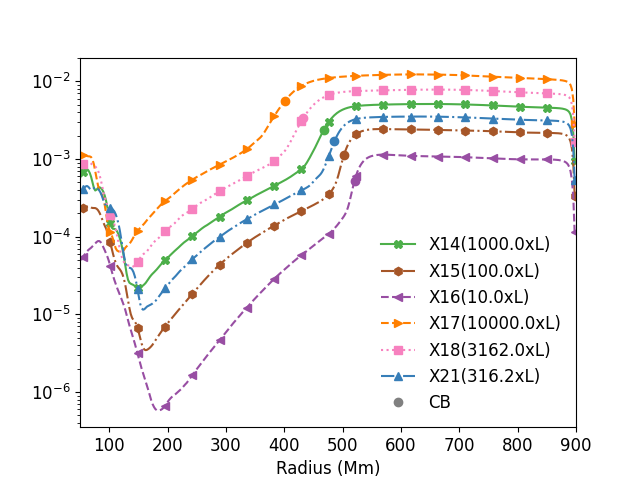

In [7]:
cvz_position = []
close(1);figure(1)
for i,run in enumerate(runs):
    dumps = dumps_range[i]
    print(run,heating[i],dumps)
    for j,dump in enumerate(dumps):
        w_momst, r_moms = rprof[run].get('|U|',dump), rprof[run].get('R',dump)
        if j==0:
            w_moms = w_momst
        else:
            w_moms += w_momst
    w_moms = w_moms/len(dumps)
    print(run,mean(w_moms))
    semilogy(r_moms, w_moms, label=run+'('+str(heating[i])+'xL)', markevery=20, color=CB_color_cycle[i])
    cp = rprof[run].bound_rad(cycles=dumps,r_min=200,r_max=800,var='|Ut|',criterion='max_grad') 
    # max_grad(Ut) instead of min_grad(Ut) because transition is going inward instead of outward
    cp = mean(cp)
    cvz_position.append(cp)
    plot(cp, np.interp(cp,r_moms[::-1],w_moms[::-1]), 'o', color=CB_color_cycle[i])
plot([0],[0],'o',color='grey',label='CB')
legend(frameon=False)
#ylim(1e-7,5e-3)
xlim(50,900)
xlabel('Radius (Mm)')
#ylabel(r'$| \nabla \times U |$ (s$^{-1}$)')
#title('Vorticity profiles - RGB bump')

## (3) Scaling law in the envelope

Scaling law of the vorticity at fixed distance below convection zone. Fixed radius would make no sense since the convective zone does not have the same extent when heating is changed.

The average is taken between `rbelow_min` and `rbelow_max`, and between `dump_min` and `dump_max`.

In [8]:
rbelow_min = 200-10
rbelow_max = 200+10
u_result = []
for i,run in enumerate(runs):
    j = 0
    um = 0
    dumpst = dumps_range[i]
    cp = rprof[run].bound_rad(cycles=dumpst,r_min=200,r_max=800,var='|Ut|',criterion='max_grad') 
    cp = mean(cp)
    print(heating[i],cp)
    for dump in dumpst:
        j += 1
        u_moms, r_moms = rprof[run].get('|U|',dump), rprof[run].get('R',dump)
        um += mean(u_moms[(r_moms>(cp-rbelow_max))&(r_moms<(cp-rbelow_min))])
    u_result.append(1e3*um/j)

1000.0 468.0463365367216
100.0 502.4593089409108
10.0 520.4401201376928
10000.0 400.66997691889094
3162.0 432.32592904329323
316.2 486.1281402816279


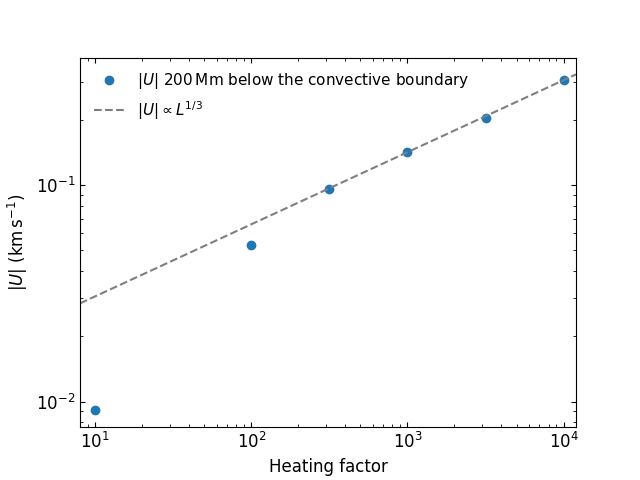

In [9]:
close(3);figure(3)
j=0
xmin, xmax = 8,12000

loglog(heating, u_result, ls='None', color='tab:blue', marker='o',
       label=r'$|U |$ 200$\,$Mm below the convective boundary')
heating_vec = np.linspace(xmin, xmax, 100)
#
exponent = 1/3
factor = np.max(u_result)/(np.max(heating)**exponent)
vort_vec = 1.0*factor*heating_vec**(exponent)
plot(heating_vec, vort_vec, '--', color='tab:grey', 
     label=r'$| U | \propto L^{1/3}$')
#
legend(frameon=False,loc=2,fontsize=11)
xlabel('Heating factor')
ylabel(r'$|U|$ (km$\,$s$^{-1}$)')
xlim(xmin, xmax)
#ylim(1e-6,.5e-4)
ax = plt.gca()
ax.tick_params(axis='both',direction='in',which='both')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
savefig('scaling_U_rad.pdf', bbox_inches='tight')
#title('Radiative envelope - RGB bump')

## (4) Scaling law in the convection zone

In [10]:
rbelow_min = 700-100
rbelow_max = 700+100
u_result = []
for i,run in enumerate(runs):
    j = 0
    um = 0
    dumpst = dumps_range[i]
    cp = rprof[run].bound_rad(cycles=dumpst,r_min=200,r_max=800,var='|Ut|',criterion='max_grad') 
    cp = mean(cp)
    print(heating[i],cp)
    for dump in dumpst:
        j += 1
        u_moms, r_moms = rprof[run].get('|U|',dump), rprof[run].get('R',dump)
        um += mean(u_moms[(r_moms>rbelow_min)&(r_moms<rbelow_max)])
    u_result.append(1e3*um/j)

1000.0 468.0463365367216
100.0 502.4593089409108
10.0 520.4401201376928
10000.0 400.66997691889094
3162.0 432.32592904329323
316.2 486.1281402816279


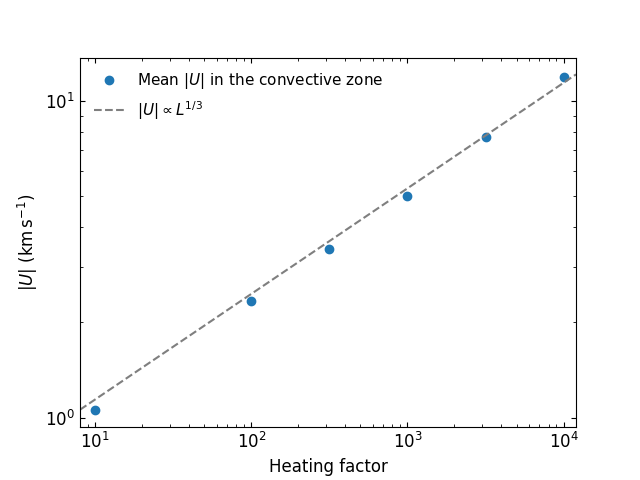

In [12]:
close(3);figure(3)
j=0
xmin, xmax = 8,12000

loglog(heating, u_result, ls='None', color='tab:blue', marker='o',
       label=r'Mean $|U |$ in the convective zone')
heating_vec = np.linspace(xmin, xmax, 100)
#
exponent = 1/3
factor = np.max(u_result)/(np.max(heating)**exponent)
vort_vec = .96*factor*heating_vec**(exponent)
plot(heating_vec, vort_vec, '--', color='tab:grey', 
     label=r'$| U | \propto L^{1/3}$')
#
legend(frameon=False,loc=2,fontsize=11)
xlabel('Heating factor')
ylabel(r'$|U|$ (km$\,$s$^{-1}$)')
xlim(xmin, xmax)
#ylim(1e-6,.5e-4)
ax = plt.gca()
ax.tick_params(axis='both',direction='in',which='both')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
savefig('scaling_U_cvz.pdf', bbox_inches='tight')
#title('Radiative envelope - RGB bump')